Title: Task 2P **Working with numpy Vectors (Unidimensional Data)** <br> Name: **HARPREET SINGH** <br>Student Number: **223925166**<br> Email : **yashu.harpreet@gmail.com**

This task is about the usage of **numpy library of python on Unidimensional Data** <br>**NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays<br> For this task we are using **latest daily close BTC-to-USD data, from 2023-01-01 up to this day,**

<br>

Staring with all the importing for necessary python libraries :<br>**numpy**- for manipulating and performing operation on arrays<br>**scipy** for scientific computing<br>**matplotlib** for plotting data on graphs

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore,iqr

<br>

<br>

To load the data, **np.genfromtxt** function will be used

In [17]:
data = np.genfromtxt('BTC-USD-new.csv')

# Print the first few ros of Data
print(f"Data: {data[:5]}")

Data: [16625.08008 16688.4707  16679.85742 16863.23828 16836.73633]


<br>

For analyzing the data, we are only concerned with **Quarter 3 ,Q3** data. For this we use **slicing technique** 

In [18]:
Q3_data = data[181:273]
Q3_data.shape

(92,)

Now we calculate **descriptive statistics** on the Q3 data using numpy functions
<br>These are :- <br>mean using **np.mean** method<br>Median using **np.median** <br> Minimum value using **np.min**<br>Maximum using **np.max**<br>STandard deviation using **np.std**<br>First & third quantile using **np.quantile**<br>

In [19]:
print(f"## arithmetic mean:{' ':5}{np.round(Q3_data.mean(), 2)}")
print(f"## minimum:{' ':13}{np.round(Q3_data.min(), 2)}")
print(f"## first quartile:{' ':6}{np.round(np.quantile(Q3_data,0.25), 2)}")
print(f"## median:{' ':14}{np.round(np.median(Q3_data), 2)}")
print(f"## third quartile:{' ':6}{np.round(np.quantile(Q3_data,0.75), 2)}")
print(f"## maximum:{' ':13}{np.round(Q3_data.max(), 2)}")
print(f"## standard deviation:{' ':2}{np.round(Q3_data.std(), 2)}")
print(f"## interquartile range:{' ':1}{np.round((np.round(np.quantile(Q3_data,0.75), 2))-(np.round(np.quantile(Q3_data,0.25), 2)),2)}")



## arithmetic mean:     28091.33
## minimum:             25162.65
## first quartile:      26225.56
## median:              28871.82
## third quartile:      29767.07
## maximum:             31476.05
## standard deviation:  1827.04
## interquartile range: 3541.51


Above table shows the **consolidated data for summary statistics**

<br>

Now we plot the **Q3 data** using **matplotlib** library and see how **prices fluctuate** in Quarter 3 data

For this we calculate the number of days using **np.arange** method to plot it on x axis  and prices on y axis

In [20]:
days = np.arange(182,182 + len(Q3_data))

Text(0.5, 0, 'Days')

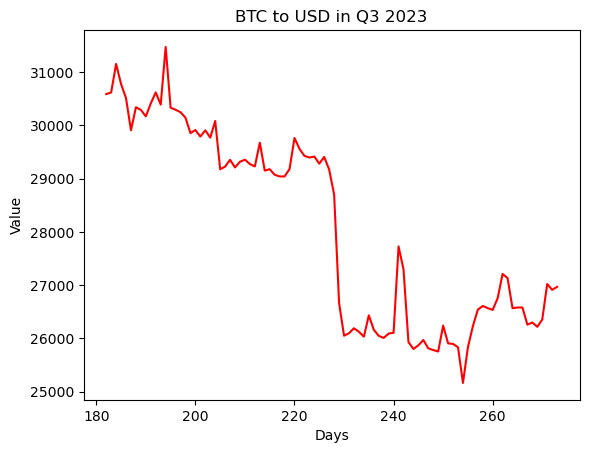

In [21]:
plt.plot(days,Q3_data,color = 'r')
plt.xlim
plt.title("BTC to USD in Q3 2023")
plt.ylabel("Value")
plt.xlabel("Days")

From above plot we see that **prices drop significantly in the middle of quarter3** with one day having the **very high price and one day having a very low price.**

<br>

Now we compute the **days** on which we observe the **highest and lowest price** respectively.For this we use **np.argmin and np.argmax** function on Q3 data which returns the **indices for the minimum and maximum observed value** in the Q3 data

In [23]:
lowest_observed_price_day = np.argmin(Q3_data)
highest_observed_price_day = np.argmax(Q3_data)

print(f"Lowest observed price day:{days[lowest_observed_price_day]} \nHighest observed price day:{days[highest_observed_price_day]}")

Lowest observed price day:254 
Highest observed price day:194


<br>

Now for further analysis **how prices increase/decrease in a day**, we use **np.diff** function on Q3 data which **returns the price difference for consecutive days**

In [24]:
diff = np.diff(Q3_data)
diff[:10]

array([  30.6914 ,  535.66992, -378.85742, -263.41601, -604.82813,
        432.92774,  -49.72461, -121.30664,  243.23632,  206.48047])

Above **diff** values  shows **both negative and positive values** which shows that **prices increase and decrease for the consecutive days**

We plot the above diff values using **plt.boxplot** function and see how **differences fluctuates** 

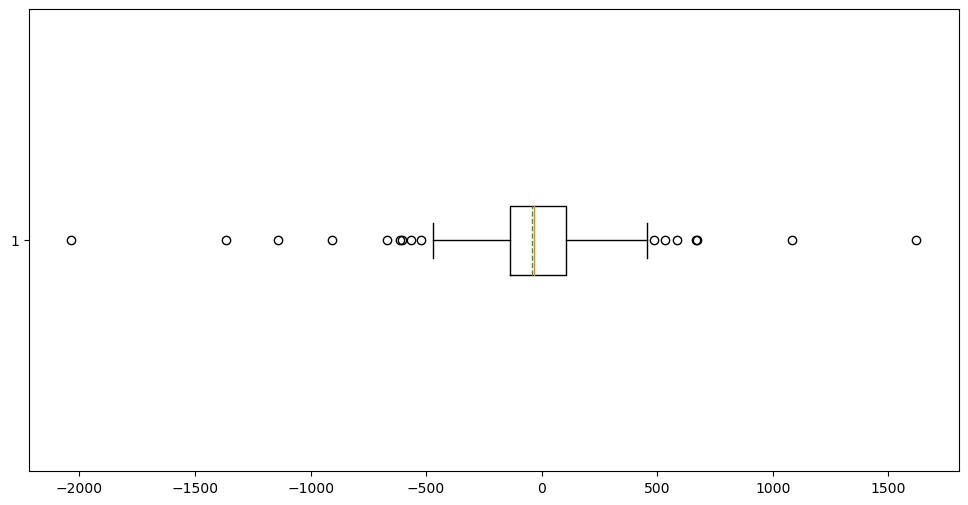

In [25]:
plt.figure(figsize = (12,6))
plt.boxplot(diff,vert=False,meanline=True,showmeans=True)
plt.show()

From above boxplot we see that there are **some outliers /anomaly prices fluctuation in Q3 data**

<br>

Now we count **how many outliers/anomaly price fluctuations present** in the data. For this we **IQR** method for **outlier detection**.<br> From **Scipy.stats** library we use **iqr** method and **values less than q1(first quantile) - 1.5*iqr or greater than q3(third quantile) +1.5iqr are outliers**

In [26]:
iqr = iqr(diff)
print(f"IQR value of Q3 data:{iqr}")

IQR value of Q3 data:239.65820499999973


Calculating the **first and third quartile using np.quantile function**

In [27]:
q1 = np.quantile(diff,0.25)
q3 = np.quantile(diff,0.75)
print(f"first quartile : {q1}\nthird quartile: {q3}")

first quartile : -134.99609500000042
third quartile: 104.6621099999993


In [28]:
LL = q1 - 1.5*iqr
UP = q3 + 1.5*iqr
mask = (diff < LL) | (diff > UP)

Above, we filter the Q3 data using **logical condition on diff data** and getting the number of outliers by using the **mask** which is having **true values return by logical condition**

In [29]:
print(f"The number of Outliers present in the Q3: {len(diff[mask])}")

The number of Outliers present in the Q3: 16


<br>

In this notebook report we analyze the BTC prices using numpy library and caluclated the summary statistics using various mathematical function using numpy library.Then we check how prices difference fluctuates in the dataset. We also saw how price fluctuates in a given quarter and found some sudden increase and decrease of prices as well. We also find outliers in the increase/decrease of the prices on consecutive days